<a href="https://colab.research.google.com/github/racc00n-ann/Innopolis/blob/main/Habr_Articles_EDA_Innopolis_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Аттестация 1: проведите первичный анализ данных

1. Изучите данные:

*   Обработайте пропуски
*   Преобразуйте признаки, если требуются
*   Постройте графики для общего понимания о данных



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from google.colab import drive
drive.mount('/content/drive')

df_howpop_train = pd.read_csv("/content/drive/My Drive/ДЗ/howpop_train.csv")

Mounted at /content/drive


In [ ]:
# Просмотр первых строк данных
df_howpop_train.head()

,url,domain,post_id,published,author,flow,polling,content_len,title,comments,favs,views,votes_plus,votes_minus,views_lognorm,favs_lognorm,comments_lognorm
0,https://habrahabr.ru/post/18284/,habrahabr.ru,18284,2008-01-01 18:19:00,@Tapac,develop,False,4305,Новогодний подарок блоггерам — WordPress 2.3.2,0,0,236,0.0,0.0,-0.792687,-1.344075,-2.436871
1,https://habrahabr.ru/post/18285/,habrahabr.ru,18285,2008-01-01 18:30:00,@DezmASter,design,False,7344,"Сумасшедшие яйца, или сервис для отслеживания ...",1,1,353,1.0,0.0,-0.485214,-0.831946,-1.873193
2,https://habrahabr.ru/post/18286/,habrahabr.ru,18286,2008-01-01 18:34:00,@DezmASter,design,False,8431,"Сумасшедшие яйца, или сервис для отслеживания ...",47,72,1200,45.0,5.0,0.446090,1.794023,0.574656
3,https://habrahabr.ru/post/18291/,habrahabr.ru,18291,2008-01-02 01:32:00,@Taoorus,design,False,5662,"Сглаживание шрифтов, и субпиксельная отрисовка",102,36,5700,72.0,3.0,1.627469,1.300050,1.167375
4,https://geektimes.ru/post/18294/,geektimes.ru,18294,2008-01-02 14:34:00,@dennydo,NaN,False,3706,Почему мне не нравится iPhone,230,6,1400,73.0,15.0,1.362397,0.961094,2.020356


## 1.1. Обработка пропусков

In [ ]:
# Проверка наличия пропусков перед обработкой
df_howpop_train.isnull().sum()

,0
url,0
domain,0
post_id,0
published,0
author,36480
flow,37089
polling,0
content_len,0
title,0
comments,0


In [ ]:
# Замена пропусков для категориальных признаков
df_howpop_train['author'].fillna("не указано", inplace=True)
df_howpop_train['flow'].fillna("не указано", inplace=True)

In [ ]:
# Заполнение пропусков для числовых признаков средним значением для сохранения общей тенденции данных
df_howpop_train['votes_plus'].fillna(df_howpop_train['votes_plus'].mean(), inplace=True)
df_howpop_train['votes_minus'].fillna(df_howpop_train['votes_minus'].mean(), inplace=True)


In [ ]:
# Проверка наличия пропусков после обработки
df_howpop_train.isnull().sum()

,0
url,0
domain,0
post_id,0
published,0
author,0
flow,0
polling,0
content_len,0
title,0
comments,0


## 1.2. Преобразование признаков

In [ ]:
# Общая информация о данных
df_howpop_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134137 entries, 0 to 134136
Data columns (total 17 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   url               134137 non-null  object 
 1   domain            134137 non-null  object 
 2   post_id           134137 non-null  int64  
 3   published         134137 non-null  object 
 4   author            134137 non-null  object 
 5   flow              134137 non-null  object 
 6   polling           134137 non-null  bool   
 7   content_len       134137 non-null  int64  
 8   title             134137 non-null  object 
 9   comments          134137 non-null  int64  
 10  favs              134137 non-null  int64  
 11  views             134137 non-null  int64  
 12  votes_plus        134137 non-null  float64
 13  votes_minus       134137 non-null  float64
 14  views_lognorm     134137 non-null  float64
 15  favs_lognorm      134137 non-null  float64
 16  comments_lognorm  13

In [ ]:
# Преобразование столбца 'published' в формат даты и времени
df_howpop_train['published'] = pd.to_datetime(df_howpop_train['published'])

In [ ]:
# Извлечение года, месяца, дня недели и часа из столбца 'published'
df_howpop_train['year'] = df_howpop_train['published'].dt.year
df_howpop_train['month'] = df_howpop_train['published'].dt.month
df_howpop_train['day_of_week'] = df_howpop_train['published'].dt.dayofweek
df_howpop_train['hour'] = df_howpop_train['published'].dt.hour

In [ ]:
# Преобразование категориальных признаков в тип категорий
df_howpop_train[['domain', 'author', 'flow']] = df_howpop_train[['domain', 'author', 'flow']].astype('category')

In [ ]:
# Проверка преобразований
df_howpop_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134137 entries, 0 to 134136
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   url               134137 non-null  object        
 1   domain            134137 non-null  category      
 2   post_id           134137 non-null  int64         
 3   published         134137 non-null  datetime64[ns]
 4   author            134137 non-null  category      
 5   flow              134137 non-null  category      
 6   polling           134137 non-null  bool          
 7   content_len       134137 non-null  int64         
 8   title             134137 non-null  object        
 9   comments          134137 non-null  int64         
 10  favs              134137 non-null  int64         
 11  views             134137 non-null  int64         
 12  votes_plus        134137 non-null  float64       
 13  votes_minus       134137 non-null  float64       
 14  view

## 1.3. Построение графиков для общего понимания о данных

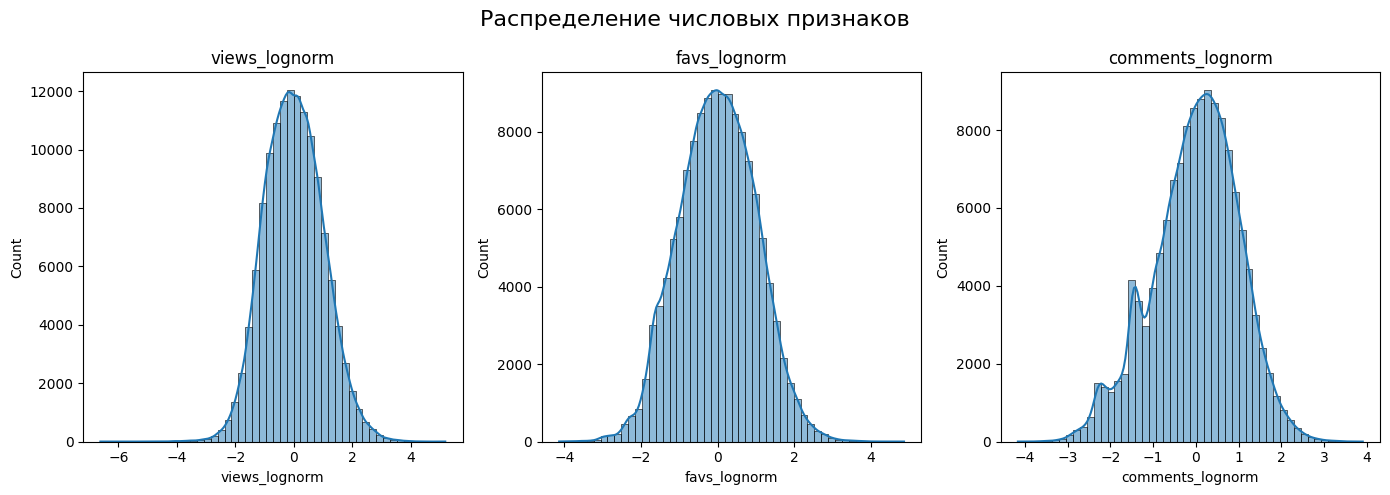

In [ ]:
# Построение графиков распределения числовых признаков
numerical_features = ['views_lognorm', 'favs_lognorm', 'comments_lognorm']
fig, axes = plt.subplots(1, 3, figsize=(14, 5))

fig.suptitle('Распределение числовых признаков', fontsize=16)
for i, feature in enumerate(numerical_features):
    sns.histplot(df_howpop_train[feature], kde=True, ax=axes[i], bins=50)
    axes[i].set_title(feature)
plt.tight_layout()
plt.show()

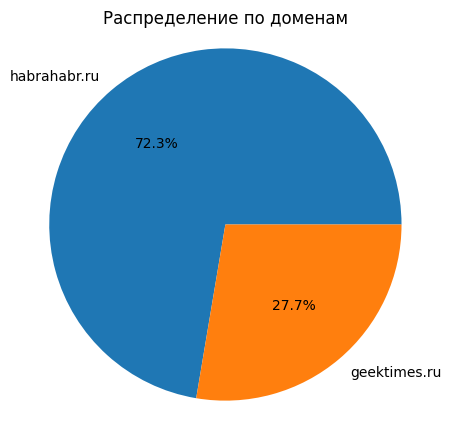

In [ ]:
# Круговая диаграмма распределения по доменам
plt.figure(figsize=(5, 5))
domain_counts = df_howpop_train['domain'].value_counts()
plt.pie(domain_counts, labels=domain_counts.index, autopct='%1.1f%%')
plt.title('Распределение по доменам')
plt.axis('equal')
plt.show()

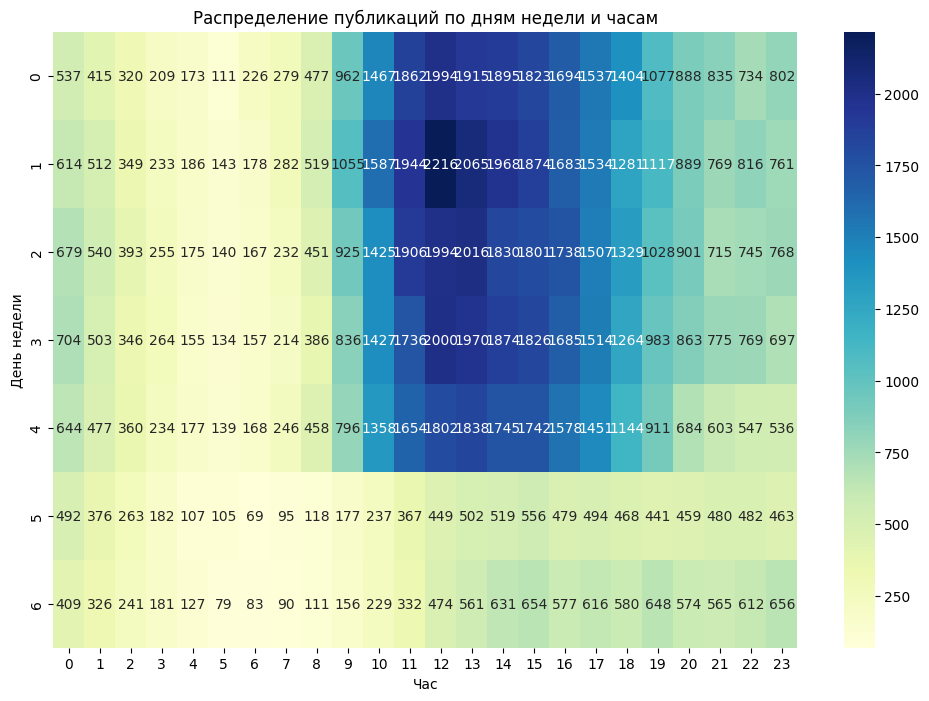

In [ ]:
# Тепловая карта распределения публикаций по дням недели и часам
heatmap_data = df_howpop_train.pivot_table(index='day_of_week', columns='hour', values='post_id', aggfunc='count')
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, cmap="YlGnBu", annot=True, fmt="d")
plt.title('Распределение публикаций по дням недели и часам')
plt.xlabel('Час')
plt.ylabel('День недели')
plt.show()

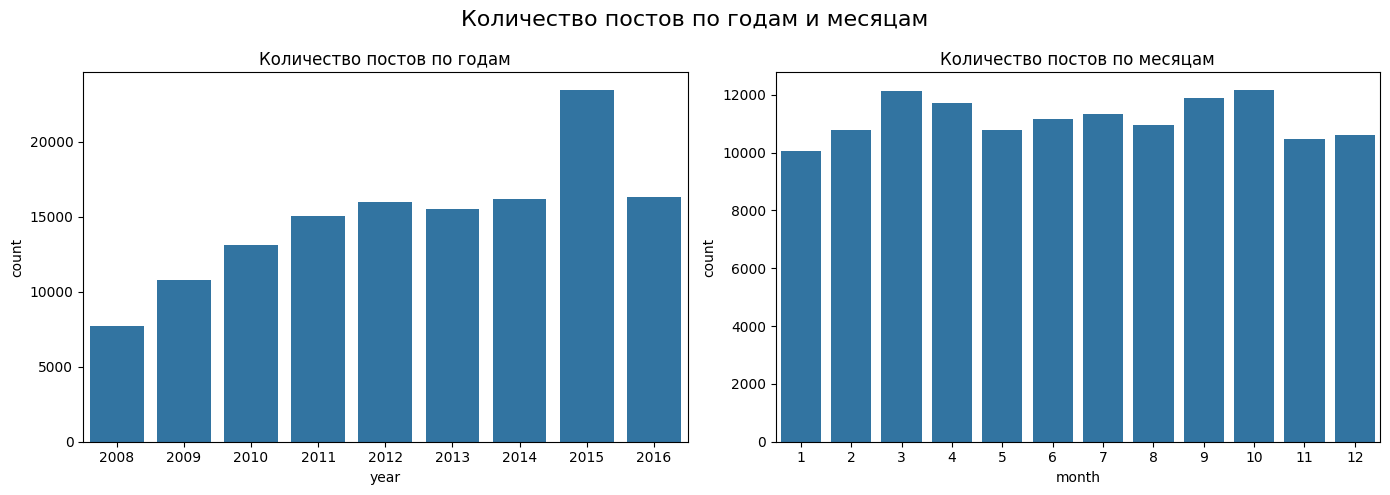

In [ ]:
# Построение временных графиков
# Количество постов по годам и месяцам
fig, axes = plt.subplots(1, 2, figsize=(14, 5))
fig.suptitle('Количество постов по годам и месяцам', fontsize=16)

sns.countplot(x='year', data=df_howpop_train, ax=axes[0])
axes[0].set_title('Количество постов по годам')

sns.countplot(x='month', data=df_howpop_train, ax=axes[1])
axes[1].set_title('Количество постов по месяцам')

plt.tight_layout()
plt.show()

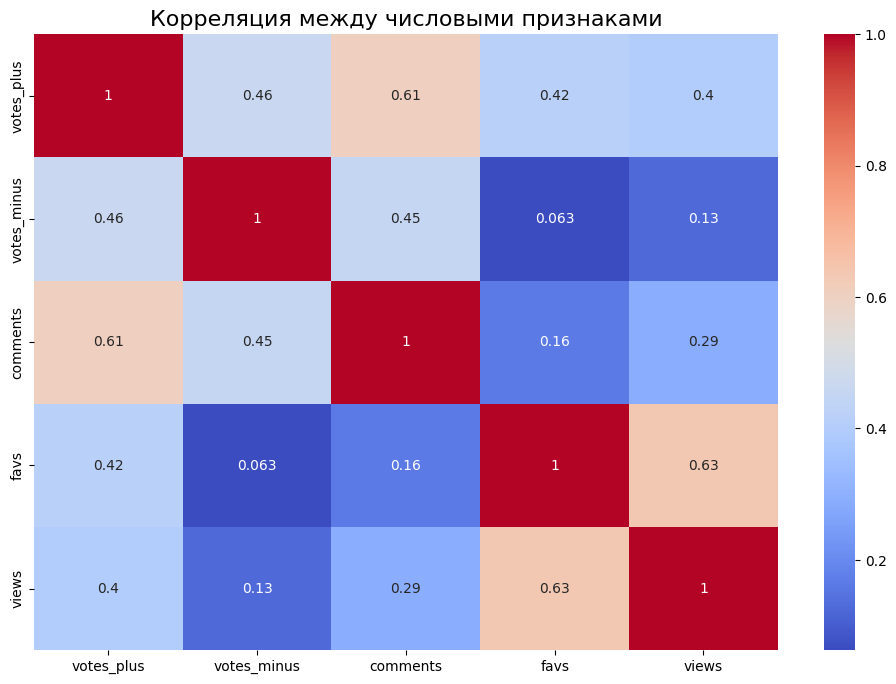

In [ ]:
# Взаимосвязь между признаками
# Тепловая карта корреляции
plt.figure(figsize=(12, 8))
sns.heatmap(df_howpop_train[['votes_plus', 'votes_minus', 'comments', 'favs', 'views']].corr(), annot=True, cmap='coolwarm')
plt.title('Корреляция между числовыми признаками', fontsize=16)
plt.show()

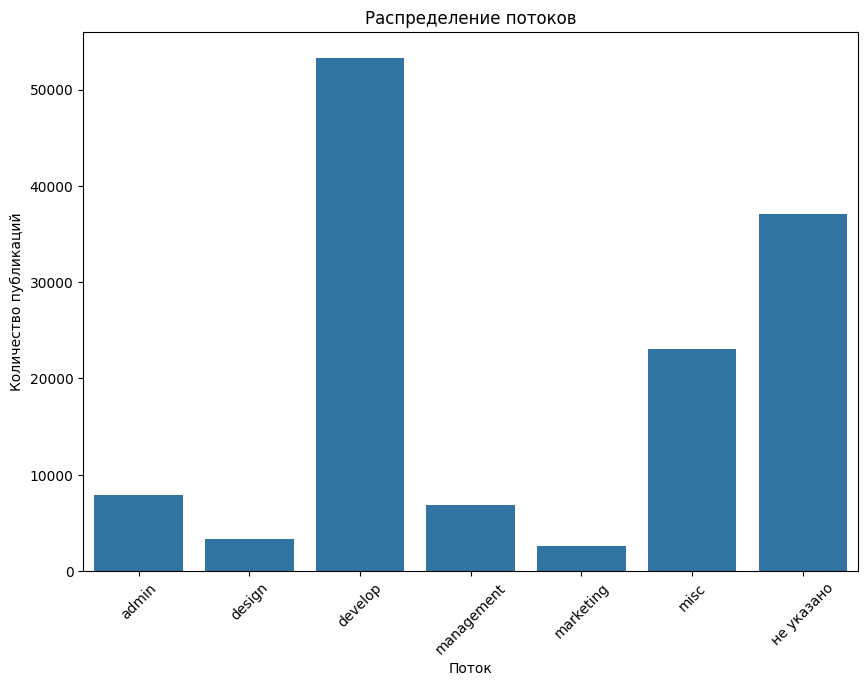

In [ ]:
# Столбчатая диаграмма для 'flow'
plt.figure(figsize=(10, 7))
flow_counts = df_howpop_train['flow'].value_counts()
sns.barplot(x=flow_counts.index, y=flow_counts.values)
plt.title('Распределение потоков')
plt.xlabel('Поток')
plt.ylabel('Количество публикаций')
plt.xticks(rotation=45)
plt.show()

# 2. Проверьте данные на нормальность(2-3 стобца)
- Объясните выбор теста

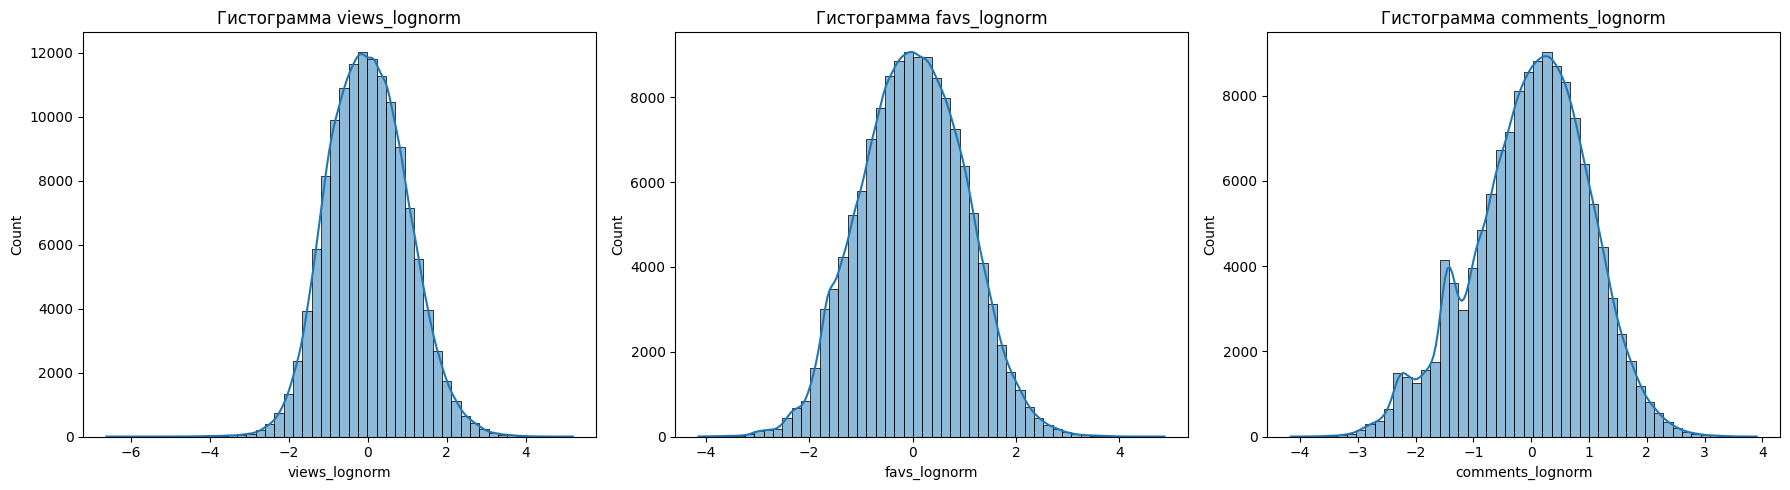

Тест Шапиро-Уилка для views_lognorm: p-значение = 1.9316517626351325e-32
views_lognorm не распределен нормально (отвергаем H0)

Тест Шапиро-Уилка для favs_lognorm: p-значение = 1.2987382237227305e-21
favs_lognorm не распределен нормально (отвергаем H0)

Тест Шапиро-Уилка для comments_lognorm: p-значение = 3.622435668962679e-55
comments_lognorm не распределен нормально (отвергаем H0)



/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 134137.
  res = hypotest_fun_out(*samples, **kwds)


In [ ]:
from scipy import stats
# Выбор признаков для проверки на нормальность
features_to_test = ['views_lognorm', 'favs_lognorm', 'comments_lognorm']
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
# Визуализация распределения признаков
for i, feature in enumerate(features_to_test):
    # Гистограмма
    sns.histplot(df_howpop_train[feature], kde=True, bins=50, ax=axes[i])
    axes[i].set_title(f'Гистограмма {feature}')

plt.tight_layout()
plt.show()

# Проведение теста Шапиро-Уилка
for feature in features_to_test:
    stat, p_value = stats.shapiro(df_howpop_train[feature])
    print(f'Тест Шапиро-Уилка для {feature}: p-значение = {p_value}')

    # H0: Данные распределены нормально
    # H1: Данные не распределены нормально
    if p_value > 0.05:
        print(f'{feature} распределен нормально (не отвергаем H0)\n')
    else:
        print(f'{feature} не распределен нормально (отвергаем H0)\n')


Тест Шапиро-Уилка точно проверяет, насколько данные соответствуют нормальному распределению, особенно для небольших выборок. Этот тест лучше всего подходит для числовых данных, таких как просмотры и избранное, которые мы анализируем.

# 3. Выдвинете гипотезу(минимум 2), проверьте ее, не забывая объясняя свой выбор

## Гипотеза 1: статьи, опубликованные в определенные дни недели, более популярны (имеют большее количество просмотров)

Нулевая гипотеза (H0): Среднее количество просмотров статей не зависит от дня недели.
Альтернативная гипотеза (H1): Среднее количество просмотров статей зависит от дня недели.

Для проверки этой гипотезы используется однофакторный дисперсионный анализ (ANOVA). Этот метод позволяет сравнить средние значения просмотров для разных дней недели.
Разделим данные по дням недели и проведем тест ANOVA для сравнения средних значений просмотров.

In [ ]:
# Группирыем данные по дням недели
grouped_data = [df_howpop_train[df_howpop_train['day_of_week'] == i]['views'] for i in range(7)]

# Проведем однофакторный ANOVA тест
f_stat, p_value = stats.f_oneway(*grouped_data)

print(f'F-статистика: {f_stat}, p-значение: {p_value}')

if p_value < 0.05:
    print("Отклоняем нулевую гипотезу, средние значения просмотров различаются в зависимости от дня недели.")
else:
    print("Не удалось отклонить нулевую гипотезу, средние значения просмотров не зависят от дня недели.")

F-статистика: 27.84582983283038, p-значение: 1.9713941751243e-33
Отклоняем нулевую гипотезу, средние значения просмотров различаются в зависимости от дня недели.


## Гипотеза 2: чем больше комментариев у статьи, тем выше ее популярность (высокое количество просмотров)

Нулевая гипотеза (H0): Нет зависимости между количеством комментариев и количеством просмотров.
Альтернативная гипотеза (H1): Существует положительная зависимость между количеством комментариев и количеством просмотров.

Для этой гипотезы будем использовать корреляционный анализ, который определяет силу и направление связи между двумя переменными. Будем использовать коэффициент корреляции Пирсона.

Посчитаем корреляцию между количеством комментариев и количеством просмотров и проверим статистическую значимость этой корреляции.

In [ ]:
# Расчет корреляции Пирсона
correlation, p_value = stats.pearsonr(df_howpop_train['comments'], df_howpop_train['views'])

print(f'Коэффициент корреляции Пирсона: {correlation}, p-значение: {p_value}')

if p_value < 0.05:
    print("Отклоняем нулевую гипотезу, существует положительная зависимость между количеством комментариев и просмотрами.")
else:
    print("Не удалось отклонить нулевую гипотезу, зависимости между количеством комментариев и просмотрами нет.")

Коэффициент корреляции Пирсона: 0.29003508403673306, p-значение: 0.0
Отклоняем нулевую гипотезу, существует положительная зависимость между количеством комментариев и просмотрами.
